## Problem Statement
Predicting players rating 

                    In this project you are going to predict the overall rating of soccer player based on their attributes 
                    such as 'crossing', 'finishing etc. 

                    The dataset you are going to use is from European Soccer Database 
                    (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 
                    10,000 players for European professional soccer seasons from 2008 to 2016. 

                    Download the data in the same folder and run the following commmand to get it in the environment 

                    About the Dataset 

                    The ultimate Soccer database for data analysis and 
                    machine learning 

                    The dataset comes in the form of an SQL database and contains statistics of about 25,000 football 
                    matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 
                    2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, 
                    with player names and a pair of coordinates to indicate their position on the pitch. 

                         +25,000 matches 
                         +10,000 players 
                         11 European Countries with their lead championship 
                         Seasons 2008 to 2016 
                         Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the 
                         weekly updates 
                         Team line up with squad formation (X, Y coordinates) 
                         Betting odds from up to 10 providers 
                         Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 
                         matches 

                    The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video 
                    games. It is not just the stats that come with a new version of the game but also the weekly 
                    updates. So for instance if a player has performed poorly over a period of time and his stats get 
                    impacted in FIFA, you would normally see the same in the dataset.

In [97]:
# Import packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,accuracy_score
from math import sqrt

## Read Data from the Database into pandas

In [101]:
# Create the connection and read the data
cnx = sqlite3.connect('database.sqlite')
data = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [102]:
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [104]:
data.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [105]:
data.describe(include='O')

,date,preferred_foot,attacking_work_rate,defensive_work_rate
count,183978,183142,180748,183142
unique,197,2,8,19
top,2007-02-22 00:00:00,right,medium,medium
freq,11794,138409,125070,130846


In [106]:
# Number of rows and columns in dataset
data.shape

(183978, 42)

In [107]:
# Column names 
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

## Exploratory data analysis

In [108]:
# Checking for missing values
data.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [109]:
# Dropping the null values as dataset consistis of 1 lakh rows
data=data.dropna()

In [110]:
data.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [111]:
data.shape

(180354, 42)

In [112]:
# defensive_work_rate column Unique values count
data['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [113]:
# preferred_foot column Unique values count
data['preferred_foot'].value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

In [114]:
# attacking_work_rate column Unique values count
data['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

## Analysing the Catergorical feature with the target variable 

In [115]:
# Dropping so that the data 
data.columns.drop('overall_rating')

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

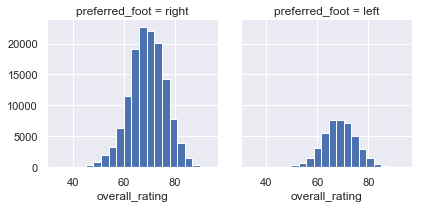

In [116]:
pf = sns.FacetGrid(data, col = 'preferred_foot')     
pf.map(plt.hist, 'overall_rating', bins = 20)

In [117]:
# from the above graph, the overall rating can be higher for the right foot prefered player then the left foot prefered player

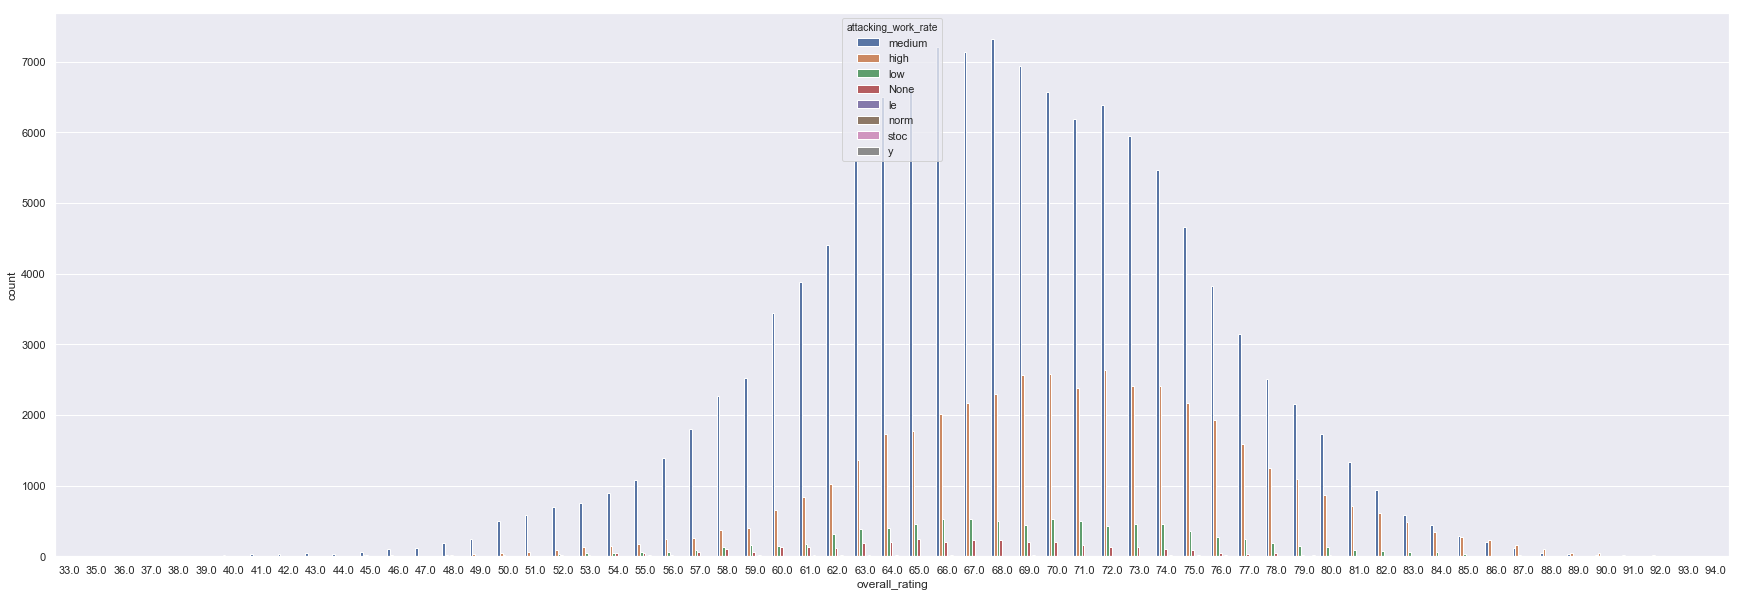

In [118]:
plt.figure(figsize=(30,10))
sns.set(style="darkgrid")
sns.countplot(x='overall_rating',hue='attacking_work_rate',data=data)
plt.show()

C:\Users\Satish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


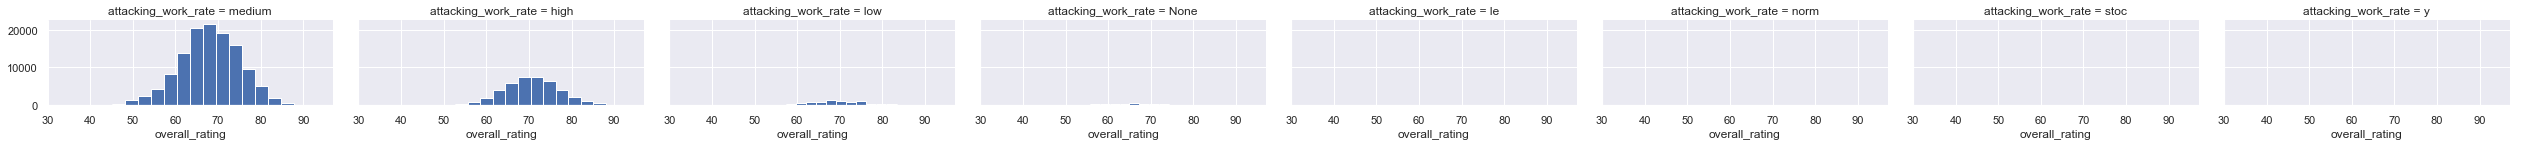

In [119]:
awr = sns.FacetGrid(df, col = 'attacking_work_rate',size=2.2,aspect=2)     
awr.map(plt.hist, 'overall_rating', bins = 20 )

In [120]:
# from the above graph, if the players attacking work rate is Medium it positively impacts the overall rating of the player. 

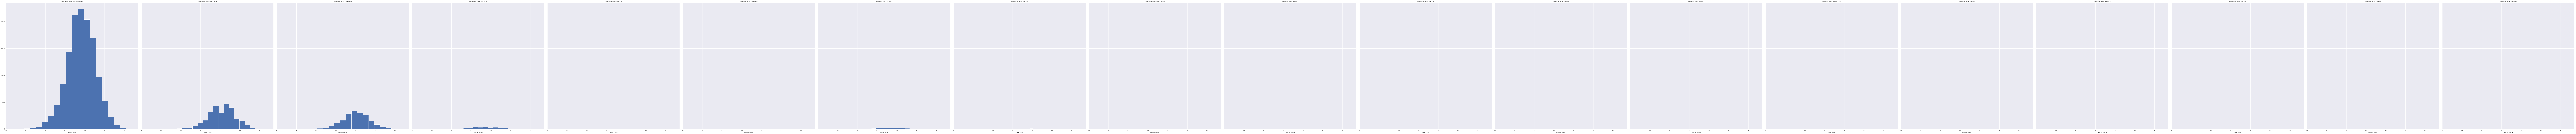

In [121]:
dwr = sns.FacetGrid(df,col='defensive_work_rate',height=15)
dwr.map(plt.hist,'overall_rating',bins=20)

In [122]:
# from the above graph, if the players defensive work rate is Medium it positively impacts the overall rating of the player. 

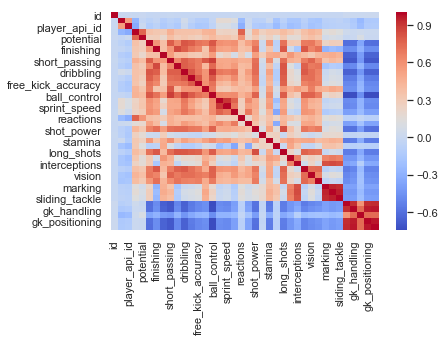

In [123]:
# Correlation  among the features
sns.heatmap(data.corr(), cmap='coolwarm')

In [124]:
# Checking the correlation between the overall_rating and  penalties
data['overall_rating'].corr(data['penalties'])

0.3927151079111881

Correlation Coefficient is 0.39. 

In [125]:
#Potential features
potential_Feat = [ 'potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
potential_Feat

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [126]:
# Correlation between all features and overall ratings
for c in potential_Feat:
    corrVal = data['overall_rating'].corr(data[c])
    print("%s: %f" % (c,corrVal))

potential: 0.765435
crossing: 0.357320
finishing: 0.330079
heading_accuracy: 0.313324
short_passing: 0.458243
volleys: 0.361739
dribbling: 0.354191
curve: 0.357566
free_kick_accuracy: 0.349800
long_passing: 0.434525
ball_control: 0.443991
acceleration: 0.243998
sprint_speed: 0.253048
agility: 0.239963
reactions: 0.771856
balance: 0.160211
shot_power: 0.428053
jumping: 0.258978
stamina: 0.325606
strength: 0.315684
long_shots: 0.392668
aggression: 0.322782
interceptions: 0.249094
positioning: 0.368978
vision: 0.431493
penalties: 0.392715
marking: 0.132185
standing_tackle: 0.163986
sliding_tackle: 0.128054
gk_diving: 0.027675
gk_handling: 0.006717
gk_kicking: 0.028799
gk_positioning: 0.008029
gk_reflexes: 0.007804


'Potential' and 'Reactions' features are highly co-related to 'overall_rating'(Target variable)

As there is no impact of the columns (id','player_fifa_api_id','player_api_id','date), removing these columns        

In [127]:
#delete the above columns from the dataset 
data.drop(['id','player_fifa_api_id','player_api_id','date'],inplace=True,axis=1)

In [128]:
data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [129]:
# Perform one hot encoding on categorical features
dummies = pd.get_dummies(data, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummies.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0


In [130]:
dummies.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_left',
       'preferred_foot_right', 'attacking_work_rate_None',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_0',
       'defensive_work_rate_1', 'defensive_work_rate_2',
       'defensive_work_rate_3', 'defensive_work_rate_4',
  

## Model Creation, training and prediction

## Linear Regression

In [131]:
X = dummies.drop('overall_rating',axis=1)
X.shape 

(180354, 62)

In [132]:
y=dummies[['overall_rating']]
y.shape

(180354, 1)

In [133]:
#split the data into train and test 
X_train, X_test ,y_train ,y_test =  train_test_split(X,y ,test_size=0.33)

In [134]:
#initiate the Linear Regression and assigning it to the object 
lr_model = LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
#fit the model with train data 
model = lr_model.fit(X_train,y_train)

In [136]:
#predict the model with the test data 
predicted_values = model.predict(X_test)

In [137]:
predicted_values

array([[69.83717205],
       [80.55431927],
       [71.26347774],
       ...,
       [70.5035684 ],
       [65.23018949],
       [70.6384417 ]])

In [138]:
# Calculating the score
model.score(X_test,y_test)

0.8419190956131704

In [139]:
# Calculating the mean square error
mean_squared_error(y_test,predict)

91.10766848659246

## Decision Tree Regression

In [140]:
max_depth_parameter =  [3, 5, 7, 9, 11,13,15,17,19,20,23,25]

In [141]:
for md in max_depth_parameter:
    dt_model = DecisionTreeRegressor(criterion='mse',max_depth=md,  random_state=0)
    dt = dt_model.fit(X_train,y_train)
    result = dt.predict(X_test)
    print("Decision Tree model accuracy score for the max_depth : " ,str(md) )
    print("Accuracy Score : " ,str(dt.score(X_test,y_test)))


Decision Tree model accuracy score for the max_depth :  3
Accuracy Score :  0.6724477190176507
Decision Tree model accuracy score for the max_depth :  5
Accuracy Score :  0.772591348060681
Decision Tree model accuracy score for the max_depth :  7
Accuracy Score :  0.8405202484229881
Decision Tree model accuracy score for the max_depth :  9
Accuracy Score :  0.8828863722880383
Decision Tree model accuracy score for the max_depth :  11
Accuracy Score :  0.9124653637297904
Decision Tree model accuracy score for the max_depth :  13
Accuracy Score :  0.9313969329409516
Decision Tree model accuracy score for the max_depth :  15
Accuracy Score :  0.9443544102753084
Decision Tree model accuracy score for the max_depth :  17
Accuracy Score :  0.9519162736713385
Decision Tree model accuracy score for the max_depth :  19
Accuracy Score :  0.9561919361901686
Decision Tree model accuracy score for the max_depth :  20
Accuracy Score :  0.9566886667479843
Decision Tree model accuracy score for the ma

#### Decision Tree Regressor can predict the target function with 95% accuracy if the max_depth is 17 or above. 
#### Linear regression can predict the target function with 84% accuracy


From above, we recommended Decision tree algorithm for predicting the overall ratings of individual player.